In [1]:
library(e1071)
library(caret)
library(ggplot2)
library(Metrics)
library(reshape2)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




In [2]:
df <- read.csv("../../../Cleaned Datasets/rebate_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$`Rebate.Amount..USD.`, p = 0.7, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

train_data$`Rebate.Amount..USD.` <- factor(train_data$`Rebate.Amount..USD.`)
test_data$`Rebate.Amount..USD.` <- factor(test_data$`Rebate.Amount..USD.`)

In [3]:
model <- svm(`Rebate.Amount..USD.` ~ ., data = train_data, type = 'C-classification',
     kernel = "radial", cost = 1, gamma = 0.1)

print(model)
summary(model)


Call:
svm(formula = Rebate.Amount..USD. ~ ., data = train_data, type = "C-classification", 
    kernel = "radial", cost = 1, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1535




Call:
svm(formula = Rebate.Amount..USD. ~ ., data = train_data, type = "C-classification", 
    kernel = "radial", cost = 1, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1535

 ( 181 568 73 713 )


Number of Classes:  4 

Levels: 
 0 1 2 3




In [4]:
predictions <- predict(model, test_data)
actual <- test_data$`Rebate.Amount..USD.`

In [5]:
conf_matrix <- confusionMatrix(predictions, actual)

predictions <- factor(predictions, levels = levels(test_data$`Rebate.Amount..USD.`))

cm <- confusionMatrix(predictions, test_data$`Rebate.Amount..USD.`)

precision <- cm$byClass[, 'Precision']
recall <- cm$byClass[, 'Recall']
f1 <- cm$byClass[, 'F1']
accuracy <- cm$overall['Accuracy']

precision <- precision[!is.na(precision)]
recall <- recall[!is.na(recall)]
f1 <- f1[!is.na(f1)]

avg_precision <- mean(precision)
avg_recall <- mean(recall)
avg_f1 <- mean(f1)

print(paste("Accuracy:", accuracy))
print(paste("Average Precision:", avg_precision))
print(paste("Average Recall:", avg_recall))
print(paste("Average F1 Score:", avg_f1))

[1] "Accuracy: 0.98527865404837"
[1] "Average Precision: 0.98586928586709"
[1] "Average Recall: 0.98527865404837"
[1] "Average F1 Score: 0.985246971742681"


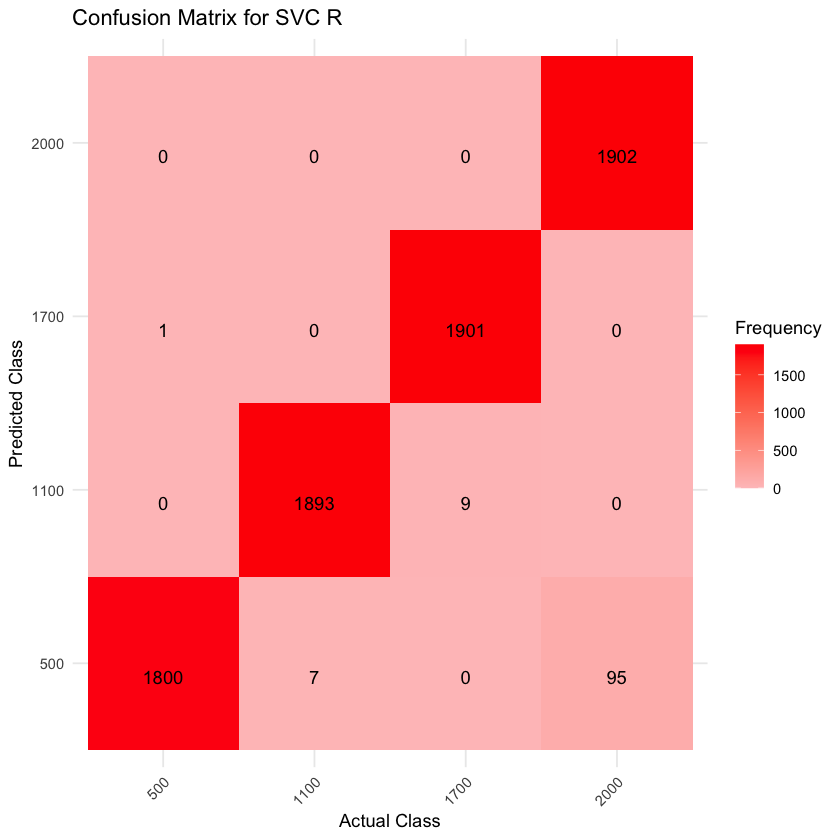

In [6]:
conf_mat <- as.matrix(conf_matrix$table)
conf_data <- as.data.frame(melt(conf_mat))
names(conf_data) <- c("Reference", "Prediction", "Frequency")

custom_labels <- c('500', '1100', '1700', '2000')

conf_data$Reference <- factor(conf_data$Reference, levels = unique(conf_data$Reference), labels = custom_labels)
conf_data$Prediction <- factor(conf_data$Prediction, levels = unique(conf_data$Prediction), labels = custom_labels)

 ggplot(conf_data, aes(x = Reference, y = Prediction, fill = Frequency)) +
    geom_tile() +
    geom_text(aes(label = Frequency), vjust = 1.5, color = "black") +
    scale_fill_gradient(low = "#ffc3c3", high = "red") +
    labs(title = "Confusion Matrix for SVC R", x = "Actual Class", y = "Predicted Class") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.text.y = element_text(angle = 0)) + 
    scale_x_discrete(labels = custom_labels) +
    scale_y_discrete(labels = custom_labels)


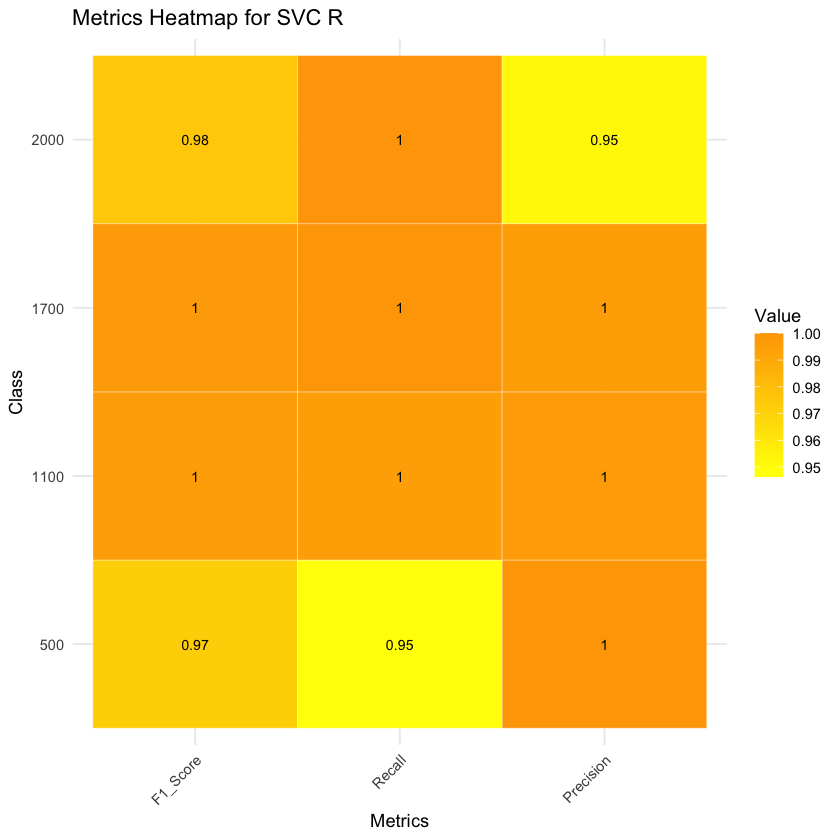

In [7]:
f1 <- cm[["byClass"]][ , "F1"]
recall <- cm[["byClass"]][ , "Recall"]
precision <- cm[["byClass"]][ , "Precision"]

metrics_df <- data.frame(Class = rownames(cm[["byClass"]]), F1_Score = f1, Recall = recall, Precision = precision)

metrics_melted <- melt(metrics_df, id.vars = "Class", variable.name = "Metric", value.name = "Value")

metrics_melted$Class <- factor(metrics_melted$Class, levels = unique(metrics_melted$Class))

custom_labels <- c('500','1100','1700','2000')

ggplot(metrics_melted, aes(x = Metric, y = Class, fill = Value, label = round(Value, 2))) +
  geom_tile(color = "white") +
  geom_text(color = "black", size = 3) +
  scale_fill_gradient(low = "yellow", high = "orange") +
  labs(title = "Metrics Heatmap for SVC R", x = "Metrics", y = "Class") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  scale_y_discrete(labels = custom_labels) 